In [2]:
pip install pandas

  Using cached numpy-2.3.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.3 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.3 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.3 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.3 MB 1.4 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.3 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.3 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/

In [5]:
pip install scikit-learn matplotlib seaborn joblib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.9 MB 2.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.9 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.4/8.9 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.9 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.9 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.9 MB 2.4 MB/s eta 0:00:03

In [3]:
import pandas as pd

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv('data.csv')

# Data preprocessing
df_clean = df.drop(['id'], axis=1)
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})

# Select features
selected_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

X = df_clean[selected_features]
y = df_clean['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (455, 10)
Testing set shape: (114, 10)


In [ ]:
# Scale the features foe SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for SVM
print("Performing hyperparameter tuning for SVM...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

svm_classifier = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Performing hyperparameter tuning for SVM...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9473


In [8]:
# Train the best model
best_svm_model = grid_search.best_estimator_

# Make predictions
y_pred = best_svm_model.predict(X_test_scaled)
y_pred_proba = best_svm_model.predict_proba(X_test_scaled)[:, 1]

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = best_svm_model.score(X_train_scaled, y_train)

print(f"\nSVM Results:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


SVM Results:
Test Accuracy: 0.9737
Training Accuracy: 0.9736

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



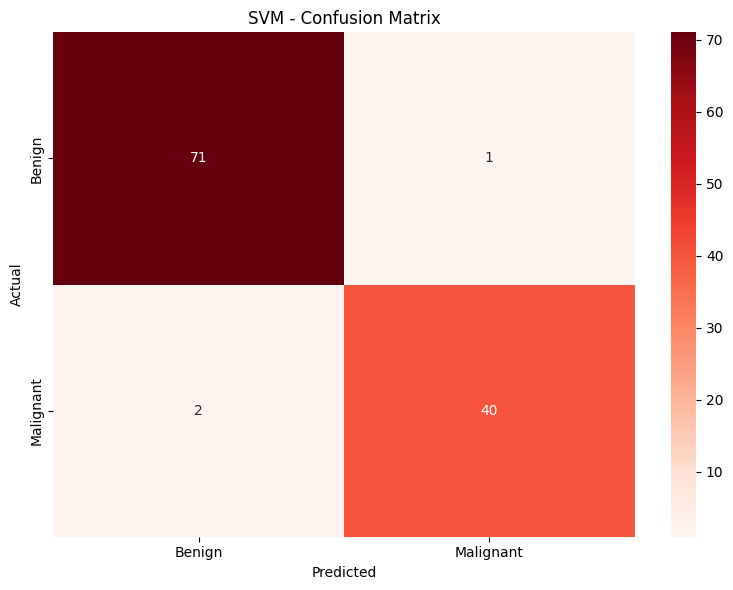

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
           xticklabels=['Benign', 'Malignant'],
           yticklabels=['Benign', 'Malignant'])
plt.title('SVM - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Save the model and scaler
joblib.dump(best_svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'svm_scaler.pkl')
print("\nSVM model and scaler saved successfully!")


SVM model and scaler saved successfully!


AUC Score: 0.9841


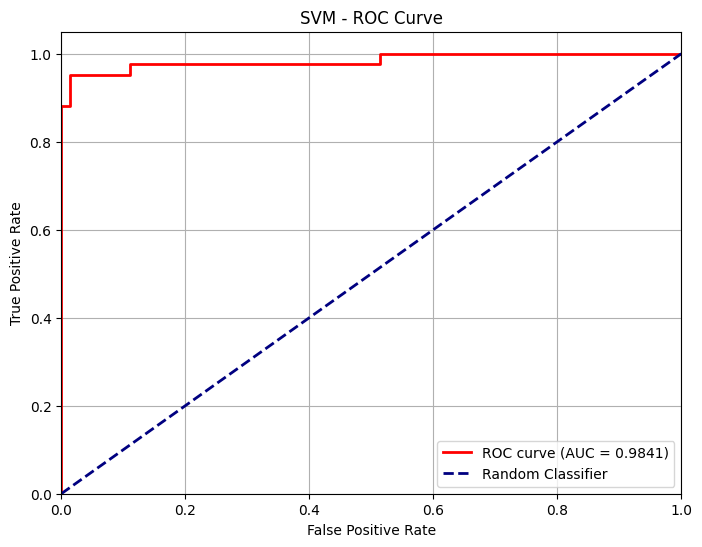


Number of support vectors: 87
Number of support vectors per class: [47 40]


In [13]:
# ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('svm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Support vectors analysis
print(f"\nNumber of support vectors: {len(best_svm_model.support_vectors_)}")
print(f"Number of support vectors per class: {best_svm_model.n_support_}")

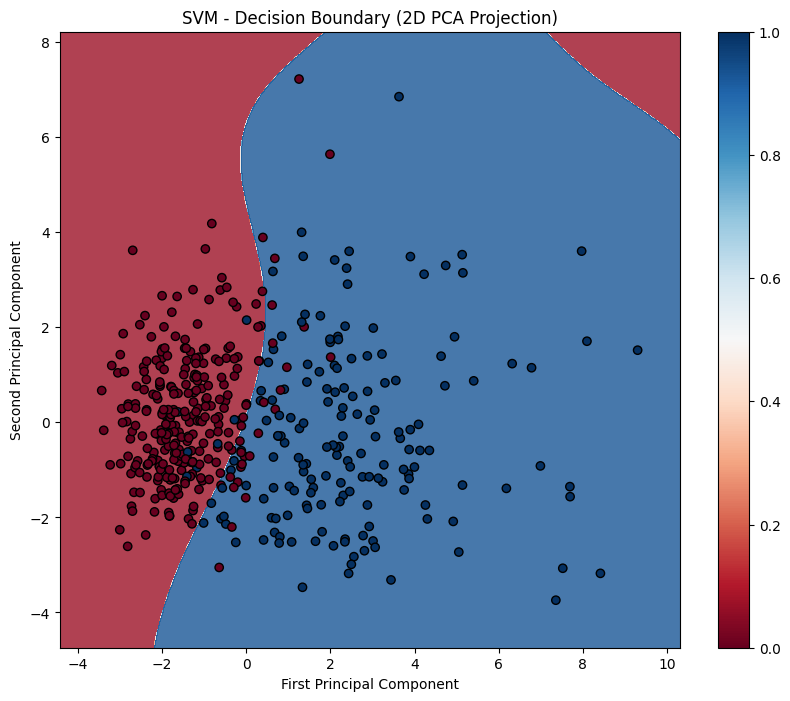

In [14]:
# Decision boundary visualization (2D projection)
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Create mesh grid for decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# Transform mesh grid points and predict
Z = best_svm_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('SVM - Decision Boundary (2D PCA Projection)')
plt.colorbar(scatter)
plt.savefig('svm_decision_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

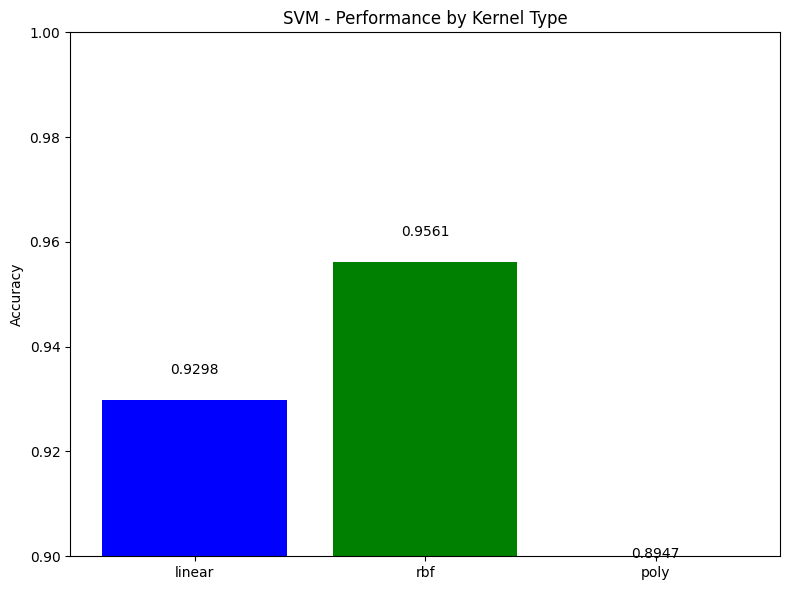


Kernel Performance Comparison:
linear: 0.9298
rbf: 0.9561
poly: 0.8947


In [15]:
# Compare different kernels
kernels = ['linear', 'rbf', 'poly']
kernel_scores = {}

for kernel in kernels:
    svm_temp = SVC(kernel=kernel, random_state=42, probability=True)
    svm_temp.fit(X_train_scaled, y_train)
    score = svm_temp.score(X_test_scaled, y_test)
    kernel_scores[kernel] = score

plt.figure(figsize=(8, 6))
plt.bar(kernel_scores.keys(), kernel_scores.values(), color=['blue', 'green', 'orange'])
plt.title('SVM - Performance by Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
for i, (kernel, score) in enumerate(kernel_scores.items()):
    plt.text(i, score + 0.005, f'{score:.4f}', ha='center')
plt.tight_layout()
plt.savefig('svm_kernel_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKernel Performance Comparison:")
for kernel, score in kernel_scores.items():
    print(f"{kernel}: {score:.4f}")

In [17]:
import pickle

# Save your trained model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm_model, f)  # Replace 'model' with your actual model variable name

# Save your scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  # Replace 'scaler' with your actual scaler variable name
